# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [1]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [2]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 3.                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

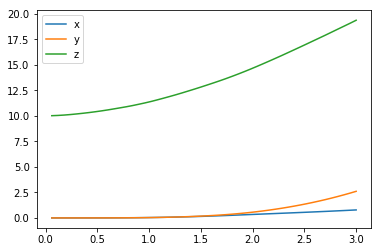

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

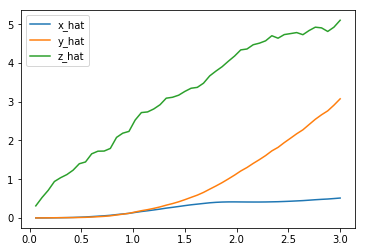

In [4]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

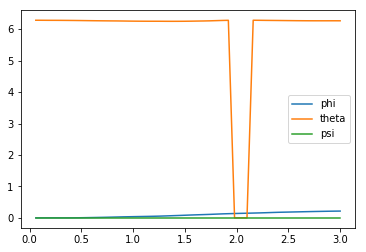

In [5]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

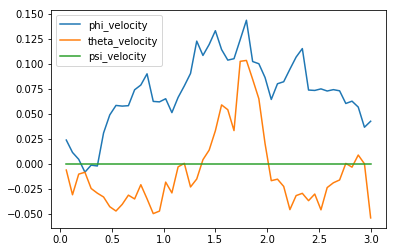

In [6]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

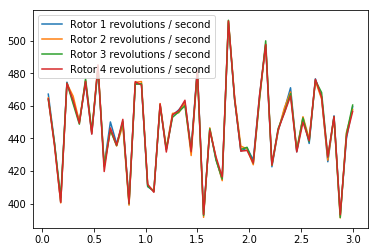

In [7]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [8]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[  1.70073132  -0.79192017  18.69964829   6.28186577   6.1055189    0.        ]
[ 2.13444249 -0.34356909  4.95128708]
[-0.09963422 -0.08371104  0.        ]


In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [15]:
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task import Task

num_episodes = 1000
target_pos = np.array([0., 0., 10.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

Episode =  509, score =  11.584 (best =  34.621), noise_scale = 3.25

/home/workspace/physics_sim.py:131: RuntimeWarning: overflow encountered in multiply
  angles = self.pose[3:] + self.angular_v * self.dt + 0.5 * self.angular_accels * self.angular_accels * self.dt**2
/home/workspace/physics_sim.py:132: RuntimeWarning: invalid value encountered in remainder
  angles = (angles + 2 * np.pi) % (2 * np.pi)


Episode = 1000, score =   8.256 (best =  52.584), noise_scale = 3.2

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

In [7]:
## TODO: Train your agent here.
import sys
import pandas as pd
from agents.agent import DDPG, Critic, ReplayBuffer, Actor
from task import Task



def TrainAgent(num_episodes, target_pos, task, agent):
    rewardlst=[]
    episodelst=[]
    
    for i_episode in range(1, num_episodes+1):
        state = agent.reset_episode() # start a new episode
        while True:
            action = agent.act(state) 
            next_state, reward, done = task.step(action)
            agent.step(action, reward, next_state, done)
            state = next_state
            if done:
                episodelst.append(i_episode)
                rewardlst.append(reward)
                print("\rEpisode = {:4d}, reward = {:7.3f}".format(
                    i_episode, reward), end="")  # [debug]
                break
        sys.stdout.flush()
    
    return episodelst, rewardlst
    
    
    
    
    



Using TensorFlow backend.


## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

Episode =  500, reward = -326.642

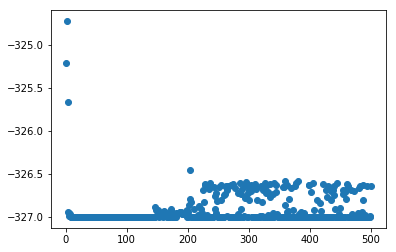

In [79]:
## TODO: Plot the rewards.
num_episodes = 500
target_pos = np.array([0., 0., 10.])
task = Task(init_pose=np.array([0., 0., 0., 0., 0., 0.]), runtime = 5., target_pos=target_pos)
agent = DDPG(task) 


episodelst1, rewardlst1 = TrainAgent(num_episodes, target_pos, task, agent)

plt.scatter(episodelst1, rewardlst1)
plt.show()


Episode =  500, reward = -327.000

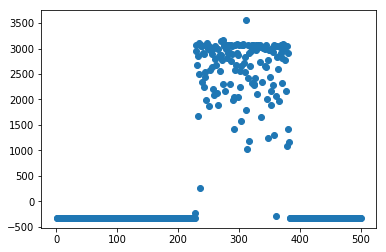

In [68]:
num_episodes = 500
target_pos = np.array([0., 0., 10.])
task = Task(init_pose=np.array([0., 0., 0., 0., 0., 0.]), runtime = 5., target_pos=target_pos)
agent = DDPG(task) 

episodelst2, rewardlst2 = TrainAgent(num_episodes, target_pos, task, agent)

plt.scatter(episodelst2, rewardlst2)
plt.show()

Episode =  500, reward = -327.000

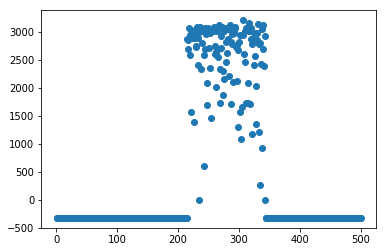

In [77]:
num_episodes = 500
target_pos = np.array([0., 0., 10.])
task = Task(init_pose=np.array([0., 0., 0., 0., 0., 0.]), runtime = 5., target_pos=target_pos)
agent = DDPG(task) 

episodelst3, rewardlst3 = TrainAgent(num_episodes, target_pos, task, agent)

plt.scatter(episodelst3, rewardlst3)
plt.show()

Episode =  500, reward = -326.981

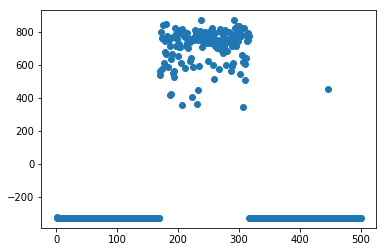

In [78]:
num_episodes = 500
target_pos = np.array([0., 0., 10.])
task = Task(init_pose=np.array([0., 0., 0., 0., 0., 0.]), runtime = 5., target_pos=target_pos)
agent = DDPG(task) 

episodelst4, rewardlst4 = TrainAgent(num_episodes, target_pos, task, agent)

plt.scatter(episodelst4, rewardlst4)
plt.show()

## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**: The task I decided to use in the end was just a simple take off task, to get from the ground to a certain minimum height (10 to be specific). I tried many things for the reward function, but in the end I used only 4 different components to calculate the reward. 

The first thing I did was to get a simple reward based on the difference in height from the position of the copter to the target height. I made it so that if the target height was greater than the copter height, than reward would be negative (meaning the reward was copter height - target height), and vice versa. This way the reward would be negative for copter heights that are less than the target height, and positive otherwise. I also added one to this reward, so that if the copter height was equal to the target height, than the reward would be one, rather than zero. Hence, the higher the copter, the greater the reward. 

The second thing I did was provide a great reward for surpassing the target height. So if the copter height was greater than the target height, I added a reward equal to that difference, but also multiplied it by a large number (I ended up chosing 15, as it worked well, in comparison to smaller numbers, or even powers -- simply squaring this added bonus gave overflow errors). This component of the reward function was to further encourage the copter to reach heights greater than the target height.

The third component was to penalize the reward for not reaching the target height in time. Instead of subtracting a number from the reward when the time went out, I decided to penalize the reward as the copter came close to timing out, and I found the 1 second before timing out to be the best time to start penalizing the reward if the target height had not been reached. Also, if the copter did acutally finish early in this time, I added a bonus reward to encourage this feat. The reward that I would add or subtract in either of these cases was the difference in height between the copter and target height.

The fourth and final component to the reward function is a penalization of the reward for staying to close to the ground. So I chose that is the height was less than 0.5, then I would punish the reward greatly. For the reward penalization, I again choses to use the difference between the target height and copter height, to keep the penalization proportional to the goal, but also multiplied the number by 10 in order to greatly encourage the copter to not stay too close to the ground.



**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**: At first I was thinking about using a policy based method, where I tried to use the simple linear policy as a guideline to make something better. Ultimately, I never got anything to work, so I decided to use the given DDPG code and employ the actor-critic method. This turned out to work in the very beginning, so I then just made the neccessary changes to give better results. 

Some hyperparameters that I played around with a lot were mu, theta, sigma, gamma and tau. I first tried changing mu, theta and sigma, because they are the values that affect the Ornstein-Uhlenbeck process, which controls the noise. Through a lot of trial and error, I found that increasing the values helped learning the most, probably because there was not enough noise with the original values, which lead to less exploration by the agent. That being said, I found very high values to make learning worse, and just the reward values for each episode would stay around one value but it would be very noisy. I also found keeping sigma > theta > mu tended to give the best and more consistent reward-episode plots, so ultimately I ended up choosing the values 0.8 for mu, 1 for theta, and 1.5 for sigma. The other parameters, gamma and tau, I tried changing later on, and decided on decreasing gamme to 0.7, and increasing tau to 0.25. In regards to tau, I found 0.2 and 0.3 to be values that gave better learning, so I chose to take the average of those two values. With a larger tau, the target weights would have more of an impact on the new weights. Now, I also found decreasing gamma helped give more consistent learning plots, though overall it didn't seem to have much of an effect. Regardless, a lower gamma value puts more emphasis on the rewards for the Q_targets values, which makes sense to do in this case since most of my time was spent trying to create the most optimal reward function. 

I used two neural networks, one in the given actor class and one in the given critic class. For both I left the original layers as is, but added some additional layers where suggested, and mostly found what worked best via trial and error. In the actor class, all I did was add a dropout layer and two additional dense layers. For the dropout layer, I used a dropout rate of 0.2, as I found higher rates made learning worse, and lower rates did not really seem to affect anything. Then the extra two dense layers I added because usually when you add these dense layers, each layer has more units than the previous, so since the last hidded layer had 32 units, I added a dense layer with 64 units, and the another one with 128 units, both with relu activation functions. I tried othe activation functions, but they either had no effect or made learning worse, so in general I tended to stick with relu activation functions. 

For the critic class, I first added a dense layer with 32 units and a relu activation function, followed by a dropout rate of 0.2, and then another dense layer with 64 units and a relu activation function (this is after the hidden layers). I found this gave me more consistent learning, but I found this from a lot of trial and error, which involved other layers, dropout rates, and activation functions. After the state and action pathways were combined, I then added the exact same 3 layers again, which also came from trial and error. In this case I thought having a dense layer with more units, like 128, would be beneficial, but learning was not as consistent when I did that. Also, once again the dropout rate of 0.2 seemed to be the best, where higher values made learning worse (preventing overfitting too much perhaps), and lower values do not really affect learning.

**Edits after the first submission:** Upon further review, , I tried implementing a few different things. The first thing was trying different learning rates in the optimizer. The defualt value is 0.001, and first I tried 0.0001 for the Actor class and 0.001 for the critic class, because these are the values from the original DDPG paper. However, they did not make any difference, so then I tried higher values, like 0.5, and up to 2, but these made no difference either. After that I tried lower values, like 0.00001, but even these did not make much of a difference, or perhaps gave worse results, since I more consistently got noisy and unlearned plots. So in the end I just left the learning rate at the default values. After playing with the learning rate, I then tried implementing batchnormalization and regularizers as suggested, to help with the vanishing and exploding gradients, as well as the consistency of learned plots. I tried many different variations of neural network architectures involving these layers (I left the last one that I tried in the Actor and Critic file, commented out), but they consistently gave me plots that did not learn, and some were noisy, but some were just a constant line. Perhaps the neural network was just too involved, though I really did expect some better results, since these extra layers that I tried were supposed to improve the 'aha' learning moments that I get. In the end, I went back to the neural network that I had before, and while it does not always learn in each run, it still does roughly half of the time, which is better than when I had implemented batchnormalization and regularizers, in which it never learned.

**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**: I plotted 4 different runs and so above there is four different examples of episode rewards plots. You can see that only two out of four of them demostrate that the agent actually learned the task (this was from the first submission, in this second submission, the task was learned in 3 plots, but in all 3 plots the task was also 'forgotten'). I would say the task is a pretty difficult task to learn, because the agent only learns about 50% of the time. You can see from the above plots, that when the agent learns the task (first and fourth plot), the reward jumps from about -330 to about 3000, creating sort of an 'aha' moment. That being said, it is still quite noisy and the reward fluctuates in a rather large range (from zero to 3000). This could be due to the fact that I increased the paramater values in the OUNoise class (essentially increasing the noise), but since the reward never goes back down to -330, that indicates that the agent has still learned the task. In the reward plots when the agent actually learns the task, the final performace is sometimes good, as it stays in the range of reward values (0 to 3000), and never goes down to -330, however sometimes (as in the above plots) the reward would drop down to -330 for a while, almost like the agent 'forgot' the task, and sometimes it would learn it again, but sometimes not (and perhaps it always would eventually forget the task if you run it for long enough). 

I figured a gradual learning curve would make sense for the episode plots, and so that is what I tried to accomplish, but everything that I tried either did nothing or created the 'aha' moment that you see above in the first and fourth plots. One of first things that I did was in the reward function -- I spend almost two weeks playing with the reward function, so most of my different attempts were regarding the reward function -- was regarding a slightly different task, which was also a take off task but with specified x and y coordinates, as well as z. Basically I wanted to punish the reward for going too far off in only one direction, so for example: I did not want the copter to reach the target x position while the copters y and z positions were still close to the initial position. I thought this would keep the copter more steady, and help with learning, but it never seemed to work (the code for this is still in the reward function in task.py, but commented out). In general, I always found more simple reward functions worked the best, but nothing ever gave me a gradual learning curve. I also tried increasing the runtime, but I found this had little to no affect in learning. When I switched to the simpler task that is implemented here, it was easier to create the 'aha' moments of learning, but a lot of different attempts would give me 'aha' learning moments for a very short amount of episodes, but also I would get the 'aha' moments very quickly and it would last a while (I think this was a sign of overfitting, as it happened more often when I had more layers in the neural networks, and not so much with the simpler neural networks). I figured the best case scenario when looking to create the 'aha' moment of learning the task, would be to have it occur consistently in each run, and at the same number of episodes. It does seem like I achieved that, as you can see above, both time the agent learned the task, it happened around the 200 episode mark, however; this occured only for half of the runs. I played with the OU noise parameters a lot, and I found increasing the noise helped me achieve the above results, but also seemingly caused noisy learning, so I feel like maybe if I increased these parameters more than I would have more consistent learning results, but also more noisy leraning.

**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**: Getting started on this project was definitely one of the hardest parts of the project, as reinforcement learning is a lot more involved than previous subjects, and I did not really know what to do in the beginning (even using the provided DDPG code confused me). Also, following the algorithms seem simple enough to me, but I did not have any experience with OOP prior to this subject, so I was quite confused on how to implement these algorithms, especially with all the different coding environments. Ultimately, the most difficult part of the project was simply trying to get a significantly different, but good/improved, result with the reward function. I spent so much time with the reward function, even with different tasks, but getting the agent to learn the task consistently for many runs rarely occured, but what was even harder was trying to get a learning curve that learned gradually over time, as this was what I was aiming for, and just could not achieve it. That being said, changing the neural networks was also somewhat difficult, but also time consuming, and certain layers would make learning take a lot longer. There are also so many different neural networks that I could have tried, just from trial and error (especially since some layers have their own parameters), but this was too time consuming. Instead, it made more sense to try and think what layers might best work in this case, but that made it harder, especially since their are two neural networks, one in the actor class and one in the critic class, while also possibly changing other hyperparameters and even the reward function (though of course I tried to only change one thing at a time).

Some more commented code explaining how the sample code works might have been helpful, though eventally I figured it out, at least some of it. I found the 'aha' moment in learning, or the jump in reward was interesting, mostly because I figured a gradual learning curve would make more sense, and so I would be curious to find out what would be needed to create the gradual learning curve, which could then be compared to what I have done.

